### Loading the data

In [1]:
from dataset import Dataset

dataset = Dataset()
dataset.call()
dataset.inspect()

X_train shape: (14208, 64, 64, 3)
14208 train samples
3552 test samples
8792 images of vehicles
8968 images of non vehicles


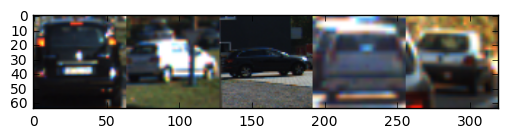

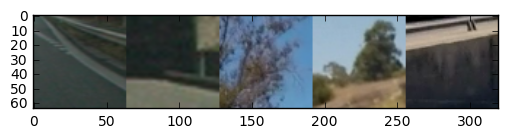

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

%matplotlib inline

cars_images = []
non_cars_images = []

for i in range(5):
    cars_images.append(mpimg.imread(random.choice(dataset.cars)))

cars_images = np.concatenate(cars_images, axis=1)
plt.imshow(cars_images)
plt.show()

for i in range(5):
    non_cars_images.append(mpimg.imread(random.choice(dataset.non_cars)))

non_cars_images = np.concatenate(non_cars_images, axis=1)
plt.imshow(non_cars_images)
plt.show()


In [3]:
from hog_classifier import *

In [4]:
cla = HOGClassifier(dataset)

In [5]:
cla.extract_data_features()

110.6 Seconds to extract HOG features...
Feature vectors shape: (17760, 8460)


In [6]:
cla.scale_features()
cla.get_labels()
cla.split_up_data()

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460


In [7]:
cla.train()

92.77 Seconds to train SVC...


In [8]:
cla.accuracy()

Test Accuracy of SVC =  0.9893
